# Final Project

---
## Name: Jerry Allan Akshay  
## Github ID: fallen-axe-shay  
## USC ID: 8603760284  
---

### Import Statements

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import re
from keras.preprocessing.text import Tokenizer
import pandas as pd
from matplotlib import pyplot as plt
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import LSTM
import random

---
### Answers
---

#### 1. Text Classification

#### 1. b) Data Exploration and Pre-processing 

In [2]:
data = {}
index = 0
list_of_words = []
review_lengths = []
for directory in os.listdir("../data"):
    for filename in os.listdir(os.path.join("../data", directory)):
        with open(os.path.join(os.path.join("../data", directory), filename), 'r') as f:
            text = f.read().lower()
            inter = re.sub(r'\n', '', text)
            inter = re.sub(r'[^a-zA-Z\s]', '', inter)
            review_words = re.split(" +", inter)
            review_lengths.append(len(review_words))
            list_of_words.extend(review_words)
            data[index] = {
                'review': inter,
                'label': -1 if 'neg' in directory else +1
            }
        index += 1

#### 1. b) iv. Number of Unique Words

In [3]:
print(f'The number of unique words in the given dataset is {len(set(list_of_words))}.')

The number of unique words in the given dataset is 46788.


#### 1. b) v.  Average review length and the Standard Deviation of review lengths

In [4]:
summary_data = {
                'Parameters':  ['Average Review Length', 'Standard Deviation of Review Length'],
                'Values': [np.mean(review_lengths), np.std(review_lengths)]
               }

summary_df = pd.DataFrame(summary_data)
summary_df.set_index('Parameters')

,Values
Parameters,
Average Review Length,645.417500
Standard Deviation of Review Length,284.985286


#### Findings
1. The average review length and the standard deviation of the review lengths is shown above.

#### 1. b) vi. Histogram of Review Lengths

(array([  2.,   2.,   9.,  30.,  66.,  88.,  81., 131., 166., 179., 171.,
        154., 162., 146., 119., 102.,  83.,  62.,  41.,  30.,  22.,  30.,
         32.,  11.,  15.,  11.,  11.,   8.,   7.,   4.,   6.,   2.,   3.,
          3.,   4.,   3.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          1.,   1.]),
 array([  17.        ,   68.02173913,  119.04347826,  170.06521739,
         221.08695652,  272.10869565,  323.13043478,  374.15217391,
         425.17391304,  476.19565217,  527.2173913 ,  578.23913043,
         629.26086957,  680.2826087 ,  731.30434783,  782.32608696,
         833.34782609,  884.36956522,  935.39130435,  986.41304348,
        1037.43478261, 1088.45652174, 1139.47826087, 1190.5       ,
        1241.52173913, 1292.54347826, 1343.56521739, 1394.58695652,
        1445.60869565, 1496.63043478, 1547.65217391, 1598.67391304,
        1649.69565217, 1700.7173913 , 1751.73913043, 1802.76086957,
        1853.7826087 , 1904.80434783, 1955.82608696, 2006.84782609,
  

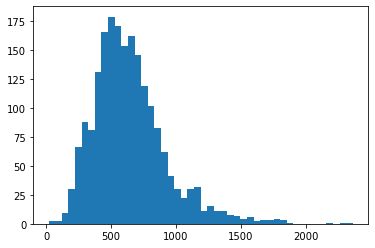

In [5]:
plt.hist(review_lengths, bins='auto')

#### Findings
1. The Histogram of review lengths is shown above.

#### 1. b) vii. Tokenizer

In [6]:
reviews = []
for i in data.keys():
    reviews.append(data[i]['review'])
t  = Tokenizer()
t.fit_on_texts(reviews)

In [7]:
t.word_index

{'the': 1,
 'a': 2,
 'and': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'in': 7,
 'that': 8,
 'it': 9,
 'as': 10,
 'with': 11,
 'for': 12,
 'his': 13,
 'this': 14,
 'film': 15,
 'but': 16,
 'he': 17,
 'i': 18,
 'on': 19,
 'are': 20,
 'by': 21,
 'be': 22,
 'its': 23,
 'an': 24,
 'not': 25,
 'one': 26,
 'movie': 27,
 'who': 28,
 'from': 29,
 'at': 30,
 'was': 31,
 'have': 32,
 'has': 33,
 'her': 34,
 'you': 35,
 'they': 36,
 'all': 37,
 'so': 38,
 'like': 39,
 'about': 40,
 'out': 41,
 'more': 42,
 'when': 43,
 'which': 44,
 'their': 45,
 'up': 46,
 'or': 47,
 'what': 48,
 'some': 49,
 'just': 50,
 'if': 51,
 'there': 52,
 'she': 53,
 'him': 54,
 'into': 55,
 'even': 56,
 'only': 57,
 'than': 58,
 'no': 59,
 'we': 60,
 'good': 61,
 'most': 62,
 'time': 63,
 'can': 64,
 'will': 65,
 'story': 66,
 'films': 67,
 'been': 68,
 'would': 69,
 'much': 70,
 'also': 71,
 'characters': 72,
 'other': 73,
 'get': 74,
 'character': 75,
 'do': 76,
 'them': 77,
 'very': 78,
 'two': 79,
 'first': 80,
 'after': 81,

#### Findings
1. The tokenized version of all the reviews in terms of word rankings is shown above.

In [8]:
reviews = []
for i in data.keys():
    if(data[i]['label']==-1):
        continue
    reviews.append(data[i]['review'])
t  = Tokenizer()
t.fit_on_texts(reviews)

In [9]:
t.word_index

{'the': 1,
 'a': 2,
 'and': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'in': 7,
 'that': 8,
 'as': 9,
 'it': 10,
 'with': 11,
 'his': 12,
 'for': 13,
 'film': 14,
 'this': 15,
 'but': 16,
 'he': 17,
 'are': 18,
 'on': 19,
 'i': 20,
 'by': 21,
 'its': 22,
 'an': 23,
 'be': 24,
 'who': 25,
 'one': 26,
 'not': 27,
 'from': 28,
 'has': 29,
 'at': 30,
 'was': 31,
 'her': 32,
 'movie': 33,
 'have': 34,
 'you': 35,
 'they': 36,
 'all': 37,
 'more': 38,
 'which': 39,
 'like': 40,
 'about': 41,
 'out': 42,
 'their': 43,
 'so': 44,
 'when': 45,
 'what': 46,
 'up': 47,
 'him': 48,
 'or': 49,
 'some': 50,
 'she': 51,
 'most': 52,
 'into': 53,
 'just': 54,
 'there': 55,
 'than': 56,
 'we': 57,
 'will': 58,
 'if': 59,
 'story': 60,
 'also': 61,
 'films': 62,
 'good': 63,
 'even': 64,
 'time': 65,
 'can': 66,
 'only': 67,
 'very': 68,
 'other': 69,
 'characters': 70,
 'no': 71,
 'much': 72,
 'character': 73,
 'would': 74,
 'life': 75,
 'been': 76,
 'well': 77,
 'first': 78,
 'two': 79,
 'them': 80,
 'see': 81

#### Findings
1. The tokenized version of the positive reviews in terms of word rankings is shown above.

In [10]:
reviews = []
for i in data.keys():
    if(data[i]['label']==+1):
        continue
    reviews.append(data[i]['review'])
t  = Tokenizer()
t.fit_on_texts(reviews)

In [11]:
t.word_index

{'the': 1,
 'a': 2,
 'and': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'in': 7,
 'that': 8,
 'it': 9,
 'with': 10,
 'this': 11,
 'as': 12,
 'for': 13,
 'but': 14,
 'i': 15,
 'film': 16,
 'his': 17,
 'on': 18,
 'he': 19,
 'are': 20,
 'be': 21,
 'movie': 22,
 'its': 23,
 'by': 24,
 'an': 25,
 'have': 26,
 'not': 27,
 'one': 28,
 'at': 29,
 'who': 30,
 'was': 31,
 'from': 32,
 'you': 33,
 'they': 34,
 'has': 35,
 'all': 36,
 'her': 37,
 'so': 38,
 'like': 39,
 'about': 40,
 'out': 41,
 'or': 42,
 'when': 43,
 'up': 44,
 'just': 45,
 'if': 46,
 'some': 47,
 'more': 48,
 'what': 49,
 'there': 50,
 'their': 51,
 'which': 52,
 'no': 53,
 'even': 54,
 'only': 55,
 'into': 56,
 'she': 57,
 'him': 58,
 'than': 59,
 'good': 60,
 'time': 61,
 'we': 62,
 'can': 63,
 'been': 64,
 'would': 65,
 'get': 66,
 'do': 67,
 'bad': 68,
 'much': 69,
 'will': 70,
 'them': 71,
 'most': 72,
 'characters': 73,
 'films': 74,
 'story': 75,
 'character': 76,
 'any': 77,
 'plot': 78,
 'other': 79,
 'two': 80,
 'after': 81,
 '

#### Findings
1. The tokenized version of the negative reviews in terms of word rankings is shown above.

#### 1. b) viii. Selection of review length L

In [12]:
L = int(np.percentile(review_lengths, 70))

In [13]:
print(f'The review length L is found to be {L}.')

The review length L is found to be 738.


#### 1. b) iii. Train-Test Split

In [14]:
pos_data = dict(filter(lambda elem: elem[1]['label'] == +1, data.items()))
neg_data = dict(filter(lambda elem: elem[1]['label'] == -1, data.items()))

In [15]:
train_data = dict(filter(lambda elem: elem[0] in range(1000, 1700), pos_data.items()))
train_data.update(dict(filter(lambda elem: elem[0] in range(0, 700), neg_data.items())))

In [16]:
test_data = dict(filter(lambda elem: elem[0] in range(1700, 2000), pos_data.items()))
test_data.update(dict(filter(lambda elem: elem[0] in range(700, 1000), neg_data.items())))

In [17]:
train_keys = list(train_data.keys())
random.shuffle(train_keys)
test_keys = list(test_data.keys())
random.shuffle(test_keys)

In [18]:
train_data_copy = {}
test_data_copy = {}
for i in train_keys:
    train_data_copy[i] = train_data[i]
for i in test_keys:
    test_data_copy[i] = test_data[i]  
train_data = train_data_copy
test_data = test_data_copy

#### Findings
1. The train and test data are split according to the instructions.

#### 1. b) ix. Make sure all review lengths are of length L

In [19]:
t = Tokenizer()

In [20]:
text_to_sequence = []
for i in train_data.keys():
    text_to_sequence.append(train_data[i]['review'])
t.fit_on_texts(text_to_sequence)
index = 0
for i in train_data.keys():
    train_data[i]['sequence'] = t.texts_to_sequences([text_to_sequence[index]])
    index += 1

In [21]:
text_to_sequence = []
for i in test_data.keys():
    text_to_sequence.append(test_data[i]['review'])
index = 0
for i in test_data.keys():
    test_data[i]['sequence'] = t.texts_to_sequences([text_to_sequence[index]])
    index += 1

In [22]:
sequences = []
for i in train_data.keys():
    sequences.append(train_data[i]['sequence'][0])

padded_seq = pad_sequences(sequences, dtype='int32', maxlen=L, value=0, truncating='pre', padding='pre')

In [23]:
padded_seq

array([[    0,     0,     0, ...,  5958,    14, 10574],
       [    0,     0,     0, ..., 14094,    30,  2373],
       [    0,     0,     0, ...,    24,  1433,  1271],
       ...,
       [  494,    13,  5135, ...,    66,     4,   125],
       [    0,     0,     0, ...,     7,     1,   221],
       [    0,     0,     0, ...,     7,  5618,  3232]])

In [24]:
index = 0
for i in train_data.keys():
    train_data[i]['padded_sequence'] = [padded_seq[index]]
    index += 1

In [25]:
sequences = []
for i in test_data.keys():
    sequences.append(test_data[i]['sequence'][0])

padded_seq = pad_sequences(sequences, dtype='int32', maxlen=L, value=0, truncating='pre', padding='pre')

In [26]:
padded_seq

array([[   0,    0,    0, ...,    1,  209, 1073],
       [  23,  839,   69, ...,    6,  187,   52],
       [   0,    0,    0, ...,    4,    2,   28],
       ...,
       [   0,    0,    0, ...,   12,    1,  544],
       [   0,    0,    0, ...,    2,   92,  952],
       [   0,    0,    0, ..., 1086,    2,  177]])

In [27]:
index = 0
for i in test_data.keys():
    test_data[i]['padded_sequence'] = [padded_seq[index]]
    index += 1

#### Findings
1. All the reviews are pre-processed to be of equal lengths L.

#### 1. c) Word Embeddings

##### Reference: https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

In [28]:
model = Sequential()
model.add(Embedding(5000, 32, input_length=L))
model.add(Flatten())

In [29]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 738, 32)           160000    
                                                                 
 flatten (Flatten)           (None, 23616)             0         
                                                                 
Total params: 160,000
Trainable params: 160,000
Non-trainable params: 0
_________________________________________________________________


In [31]:
pad_seq = []
labels = []
for i in train_data.keys():
    pad_seq.append(train_data[i]['padded_sequence'][0])
    labels.append(train_data[i]['label'])

In [32]:
training_padded = np.array(pad_seq)
training_labels = np.array(labels)
model.fit(training_padded, training_labels, epochs=2, batch_size=10, verbose=0)

In [33]:
model.predict(training_padded, batch_size=10)

array([[-0.0299423 , -0.01211453, -0.00605423, ...,  0.        ,
         0.        ,  0.        ],
       [-0.0299423 , -0.01211453, -0.00605423, ..., -0.00761645,
        -0.00926932, -0.04127712],
       [-0.0299423 , -0.01211453, -0.00605423, ..., -0.0113719 ,
         0.01833908, -0.0357318 ],
       ...,
       [-0.01209734, -0.01273774, -0.0087241 , ...,  0.01177405,
         0.0292093 , -0.04520047],
       [-0.0299423 , -0.01211453, -0.00605423, ..., -0.01747793,
        -0.02847166,  0.05693713],
       [-0.0299423 , -0.01211453, -0.00605423, ..., -0.03035166,
         0.03412592, -0.04882853]], dtype=float32)

In [34]:
pad_seq = []
for i in test_data.keys():
    pad_seq.append(test_data[i]['padded_sequence'][0])
test_padded = np.array(pad_seq)

In [35]:
model.predict(test_padded, batch_size=10)

array([[-0.0299423 , -0.01211453, -0.00605423, ...,  0.01823938,
         0.02698135, -0.04061051],
       [-0.00326023, -0.01453736, -0.01595159, ..., -0.04162539,
        -0.01162004, -0.02313917],
       [-0.0299423 , -0.01211453, -0.00605423, ..., -0.03826631,
         0.00747359, -0.0083457 ],
       ...,
       [-0.0299423 , -0.01211453, -0.00605423, ...,  0.0707026 ,
         0.07731537, -0.03253548],
       [-0.0299423 , -0.01211453, -0.00605423, ...,  0.04378079,
        -0.03985089,  0.07313098],
       [-0.0299423 , -0.01211453, -0.00605423, ..., -0.01537106,
        -0.02012315, -0.01718192]], dtype=float32)

#### Findings
1. The flattened word embedding vectors are shown above for both the test and train data.

#### 1. d) Multi-Layer Perceptron

In [36]:
M = 10

In [37]:
pad_seq = []
labels = []
for i in train_data.keys():
    pad_seq.append(train_data[i]['padded_sequence'][0])
    labels.append(0 if train_data[i]['label']==-1 else 1)
training_padded = np.array(pad_seq)
training_labels = np.array(labels)
pad_seq = []
labels = []
for i in test_data.keys():
    pad_seq.append(test_data[i]['padded_sequence'][0])
    labels.append(0 if test_data[i]['label']==-1 else 1)
test_padded = np.array(pad_seq)
test_labels = np.array(labels)

In [38]:
model = Sequential()
model.add(Embedding(5000, 32, input_length=L))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [39]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 738, 32)           160000    
                                                                 
 flatten_1 (Flatten)         (None, 23616)             0         
                                                                 
 dense (Dense)               (None, 50)                1180850   
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)               

In [41]:
train_accuracies = []
test_accuracies = []
for i in range(M):
    model = Sequential()
    model.add(Embedding(5000, 32, input_length=L))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(training_padded, training_labels, epochs=2, batch_size=10, verbose=0)
    loss, accuracy = model.evaluate(training_padded, training_labels, verbose=0)
    train_accuracies.append(accuracy*100)
    loss, accuracy = model.evaluate(test_padded, test_labels, verbose=0)
    test_accuracies.append(accuracy*100)

In [42]:
summary_data = {
                'Parameters':  ['Train Accuracy', 'Test Accuracy'],
                'Values': [f'{round(np.mean(train_accuracies), 2)}%', f'{round(np.mean(test_accuracies),2)}%']
               }

summary_df = pd.DataFrame(summary_data)
summary_df.set_index('Parameters')

,Values
Parameters,
Train Accuracy,88.31%
Test Accuracy,60.37%


#### Findings
1. The training and test accuracies for the MLP model is shown above. (Averaged over 10 simulations)

#### 1. e) One-Dimensional Convolutional Neural Network

In [43]:
model = Sequential()
model.add(Embedding(5000, 32, input_length=L))
model.add(Conv1D(filters=32, kernel_size=3))
model.add(MaxPooling1D(pool_size=2, strides=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [44]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 738, 32)           160000    
                                                                 
 conv1d (Conv1D)             (None, 736, 32)           3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 368, 32)          0         
 )                                                               
                                                                 
 flatten_12 (Flatten)        (None, 11776)             0         
                                                                 
 dense_44 (Dense)            (None, 50)                588850    
                                                                 
 dropout_33 (Dropout)        (None, 50)                0         
                                                     

In [46]:
train_accuracies = []
test_accuracies = []
for i in range(M):
    model = Sequential()
    model.add(Embedding(5000, 32, input_length=L))
    model.add(Conv1D(filters=32, kernel_size=3))
    model.add(MaxPooling1D(pool_size=2, strides=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(training_padded, training_labels, epochs=2, batch_size=10, verbose=0)
    loss, accuracy = model.evaluate(training_padded, training_labels, verbose=0)
    train_accuracies.append(accuracy*100)
    loss, accuracy = model.evaluate(test_padded, test_labels, verbose=0)
    test_accuracies.append(accuracy*100)

In [47]:
summary_data = {
                'Parameters':  ['Train Accuracy', 'Test Accuracy'],
                'Values': [f'{round(np.mean(train_accuracies), 2)}%', f'{round(np.mean(test_accuracies),2)}%']
               }

summary_df = pd.DataFrame(summary_data)
summary_df.set_index('Parameters')

,Values
Parameters,
Train Accuracy,77.96%
Test Accuracy,60.68%


#### Findings
1. The train and test accuracies for the one-dimensional CNN is shown above. (Averaged over 10 simulations)

#### 1. f) Long Short-Term Memory Recurrent Neural Network

In [48]:
model = Sequential()
model.add(Embedding(5000, 32, input_length=L))
model.add(LSTM(32, dropout=0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [49]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_23 (Embedding)    (None, 738, 32)           160000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_88 (Dense)            (None, 256)               8448      
                                                                 
 dropout_66 (Dropout)        (None, 256)               0         
                                                                 
 dense_89 (Dense)            (None, 1)                 257       
                                                                 
Total params: 177,025
Trainable params: 177,025
Non-trainable params: 0
_________________________________________________________________


In [51]:
epoch_accuracies = {}
for epoch in range(10, 51):
    train_accuracies = []
    test_accuracies = []
    model = Sequential()
    model.add(Embedding(5000, 32, input_length=L))
    model.add(LSTM(32, dropout=0.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(training_padded, training_labels, epochs=epoch, batch_size=10, verbose=0)
    loss, accuracy = model.evaluate(training_padded, training_labels, verbose=0)
    train_accuracies.append(accuracy*100)
    loss, accuracy = model.evaluate(test_padded, test_labels, verbose=0)
    test_accuracies.append(accuracy*100)
    epoch_accuracies[epoch] = {
        'train_accuracy': np.mean(train_accuracies),
        'test_accuracy': np.mean(test_accuracies),
    }

In [52]:
sorted_epochs = dict(sorted(epoch_accuracies.items(), key=lambda item: item[1]['test_accuracy'], reverse=True))

In [53]:
best_epoch = list(sorted_epochs.keys())[0]

train = round(sorted_epochs[best_epoch]['train_accuracy'], 2)
test = round(sorted_epochs[best_epoch]['test_accuracy'],2)

summary_data = {
                'Parameters':  ['Train Accuracy', 'Test Accuracy', 'Best number of epochs'],
                'Values': [f'{train}%', f'{test}%', f'{best_epoch}']
               }

summary_df = pd.DataFrame(summary_data)
summary_df.set_index('Parameters')

,Values
Parameters,
Train Accuracy,100.0%
Test Accuracy,79.33%
Best number of epochs,39


#### Findings
1. The Train and Test accuracies for the LSTM model are shown above (for the best epoch).